<a href="https://colab.research.google.com/github/dxda6216/Q10_Temp_vs_Activity/blob/main/Q10_temp_vs_activity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Temperatures =  [20.  20.  22.5 22.5 25.  25.  27.5 27.5 30.  30.  32.5 32.5 35.  35.
 37.5 37.5 40.  40. ]
Activities =  [ 2.9  3.   3.1  3.6  4.   4.1  4.3  4.8  5.6  5.8  7.2  6.9  8.3  9.5
 10.1 10.3 11.8 12.4] 

Median of Temperatures =  30.0 °C
Estimated activity at  30.0 °C = 5.851 ± 0.096
Q10 (temperature coefficient) = 2.095 ± 0.047
R² = 0.988435 



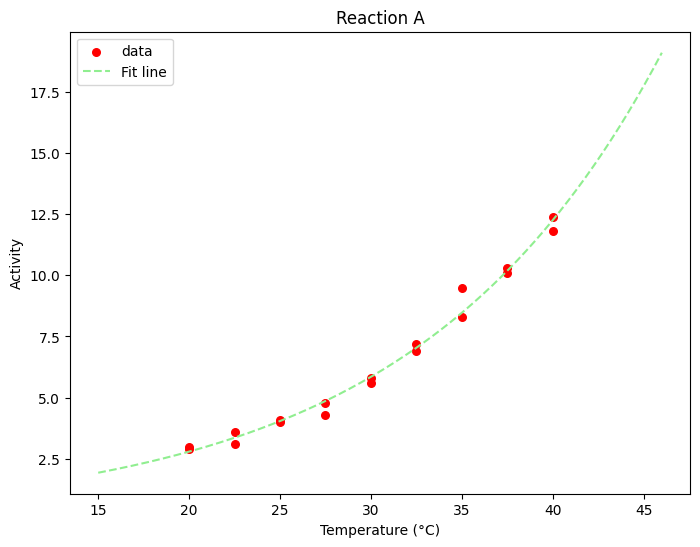

In [9]:
### This is a simple script to calculate Q10 values for activity.
### length by using SciPy Optimize non-linear least squares fit on Colab.
### Copyright (c) 2022 by dxda6216 (dxda6216 AT gmail DOT com)
###
#@title Q10 calculator (Temperature vs. Reaction Rate)
import numpy as np
import statistics
from scipy.optimize import curve_fit
from matplotlib import pyplot as plt


#@markdown This is to caluculate Q10 temperature coefficient for reaction rate, enzymatic activity, frequency, etc (not for circadian period).

#@markdown For the circadian period, please use https://github.com/dxda6216/q10

#@markdown Input data, then hit **Runtime** -> **Run all** (or press **Ctrl+F9**).

# @markdown ---

# Data description (plot title)
Data_description = "Reaction A" #@param {type:"string"}

# Temperature data
Temperatures = 20.0, 20.0, 22.5, 22.5, 25.0, 25.0, 27.5, 27.5, 30.0, 30.0, 32.5, 32.5, 35.0, 35.0, 37.5, 37.5, 40.0, 40.0 #@param {type:"raw"}
x = np.array(Temperatures)

# Period data
Activities = 2.9,  3.0, 3.1, 3.6, 4.0, 4.1, 4.3, 4.8, 5.6, 5.8, 7.2, 6.9, 8.3, 9.5, 10.1, 10.3, 11.8, 12.4  #@param {type:"raw"}
y = np.array(Activities)

median_x = statistics.median(x)

# Printing the data
print('Temperatures = ', x)
print('Activities = ', y, '\n')

print('Median of Temperatures = ', median_x,'\u00B0C')

# Defining an equation for curve fitting
# fitting parameters:
#     ActivityTM : activity at the Median of Temperatures
#     q10 : temperature coefficient (Q10)
def func(x, ActivityTM, q10):
	return ( q10 ** ( ( x - median_x ) * 0.1 ) ) * ActivityTM

# Initial values for the fitting parameters
# p0 = np.array([24.000, 1.000])

# Initial values for the fitting parameters
#
Initial_fitting_parameter_activity_at_median_temperature = 1.000#@param {type:"number"}
Initial_fitting_parameter_Q10 = 1.000#@param {type:"number"}
p0 = np.array([Initial_fitting_parameter_activity_at_median_temperature, Initial_fitting_parameter_Q10])

# Displaying Tab-delimited data Yes or No
Display_tab_delimited_data = "No" #@param ["No", "Yes"]

# @markdown ---
# Figure Settings ON of OFF
Set_graphical_parameters_of_figure = "No (Graph axes, tick marks, etc will automatically be adjusted)" #@param ["No (Graph axes, tick marks, etc will automatically be adjusted)", "Yes (Set the parameters)"]
# Set_graphical_parameters_of_figure = "No (Graph axes, tick marks, etc will automatically be adjusted)"

# Figure graphical_parameter settings
# psx[0] : figure size - width
# psx[1] : figure size - height
# psx[2] : X-axis scale - min
# psx[3] : X-axis scale - max
# psx[4] : X-axis ticks - starting
# psx[5] : X-axis ticks - ending
# psx[6] : X-axis ticks - interval
# psx[7] : Y-axis scale - min
# psx[8] : Y-axis scale - max
# psx[9] : Y-axis ticks - starting
# psx[10] : Y-axis ticks - ending
# psx[11] : Y-axis ticks - interval
# psx[12] : Fitted curve - starting
# psx[13] : Fitted curve - ending
# Figure_graphical_parameters =  8, 6, 27, 45, 28, 45, 2, 14, 45, 14, 45, 2, 28, 43 #@param {type:"raw"}
# psx = np.array(Figure_graphical_parameters)
psx = [8, 6, 27, 45, 28, 45, 2, 14, 45, 14, 45, 2, 28, 43, 30]


# Figure graphical_parameter settings
Figure_size_width = 8.0 # @param {type:"number"}
psx[0] = Figure_size_width
Figure_size_height = 6.0 # @param {type:"number"}
psx[1] = Figure_size_height
X_axis_scale_min = 18.0 # @param {type:"number"}
psx[2] = X_axis_scale_min
X_axis_scale_max = 42.0 # @param {type:"number"}
psx[3] = X_axis_scale_max
X_axis_ticks_starting = 20.0 # @param {type:"number"}
psx[4] = X_axis_ticks_starting
X_axis_ticks_ending = 40.0 # @param {type:"number"}
psx[5] = X_axis_ticks_ending
X_axis_ticks_interval = 2.0 # @param {type:"number"}
psx[6] = X_axis_ticks_interval
X_axis_caption = "Temperature (\u00B0C)" # @param {type:"string"}
Y_axis_scale_min = 0.0 # @param {type:"number"}
psx[7] = Y_axis_scale_min
Y_axis_scale_max = 15.0 # @param {type:"number"}
psx[8] = Y_axis_scale_max
Y_axis_ticks_starting = 0.0 # @param {type:"number"}
psx[9] = Y_axis_ticks_starting
Y_axis_ticks_ending = 15.0 # @param {type:"number"}
psx[10] = Y_axis_ticks_ending
Y_axis_ticks_interval = 1.0 # @param {type:"number"}
psx[11] = Y_axis_ticks_interval
Y_axis_caption = "Activity" # @param {type:"string"}
Fitted_curve_X_starting = 19.0 # @param {type:"number"}
psx[12] = Fitted_curve_X_starting
Fitted_curve_X_ending = 41.0 # @param {type:"number"}
psx[13] = Fitted_curve_X_ending
Marker_size = 30 # @param {type:"slider", min:0, max:300, step:1}
psx[14] = Marker_size
Marker_color = "red" # @param ["black", "dimgray", "dimgrey", "gray", "grey", "darkgray", "darkgrey", "silver", "lightgray", "lightgrey", "gainsboro", "whitesmoke", "white", "snow", "rosybrown", "lightcoral", "indianred", "brown", "firebrick", "maroon", "darkred", "red", "mistyrose", "salmon", "tomato", "darksalmon", "coral", "orangered", "lightsalmon", "sienna", "seashell", "chocolate", "saddlebrown", "sandybrown", "peachpuff", "peru", "linen", "bisque", "darkorange", "burlywood", "antiquewhite", "tan", "navajowhite", "blanchedalmond", "papayawhip", "moccasin", "orange", "wheat", "oldlace", "floralwhite", "darkgoldenrod", "goldenrod", "cornsilk", "gold", "lemonchiffon", "khaki", "palegoldenrod", "darkkhaki", "ivory", "beige", "lightyellow", "lightgoldenrodyellow", "olive", "yellow", "olivedrab", "yellowgreen", "darkolivegreen", "greenyellow", "chartreuse", "lawngreen", "honeydew", "darkseagreen", "palegreen", "lightgreen", "forestgreen", "limegreen", "darkgreen", "green", "lime", "seagreen", "mediumseagreen", "springgreen", "mintcream", "mediumspringgreen", "mediumaquamarine", "aquamarine", "turquoise", "lightseagreen", "mediumturquoise", "azure", "lightcyan", "paleturquoise", "darkslategray", "darkslategrey", "teal", "darkcyan", "aqua", "cyan", "darkturquoise", "cadetblue", "powderblue", "lightblue", "deepskyblue", "skyblue", "lightskyblue", "steelblue", "aliceblue", "dodgerblue", "lightslategray", "lightslategrey", "slategray", "slategrey", "lightsteelblue", "cornflowerblue", "royalblue", "ghostwhite", "lavender", "midnightblue", "navy", "darkblue", "mediumblue", "blue", "slateblue", "darkslateblue", "mediumslateblue", "mediumpurple", "rebeccapurple", "blueviolet", "indigo", "darkorchid", "darkviolet", "mediumorchid", "thistle", "plum", "violet", "purple", "darkmagenta", "fuchsia", "magenta", "orchid", "mediumvioletred", "deeppink", "hotpink", "lavenderblush", "palevioletred", "crimson", "pink", "lightpink"]
Fitted_curve_line_color = "lightgreen" # @param ["black", "dimgray", "dimgrey", "gray", "grey", "darkgray", "darkgrey", "silver", "lightgray", "lightgrey", "gainsboro", "whitesmoke", "white", "snow", "rosybrown", "lightcoral", "indianred", "brown", "firebrick", "maroon", "darkred", "red", "mistyrose", "salmon", "tomato", "darksalmon", "coral", "orangered", "lightsalmon", "sienna", "seashell", "chocolate", "saddlebrown", "sandybrown", "peachpuff", "peru", "linen", "bisque", "darkorange", "burlywood", "antiquewhite", "tan", "navajowhite", "blanchedalmond", "papayawhip", "moccasin", "orange", "wheat", "oldlace", "floralwhite", "darkgoldenrod", "goldenrod", "cornsilk", "gold", "lemonchiffon", "khaki", "palegoldenrod", "darkkhaki", "ivory", "beige", "lightyellow", "lightgoldenrodyellow", "olive", "yellow", "olivedrab", "yellowgreen", "darkolivegreen", "greenyellow", "chartreuse", "lawngreen", "honeydew", "darkseagreen", "palegreen", "lightgreen", "forestgreen", "limegreen", "darkgreen", "green", "lime", "seagreen", "mediumseagreen", "springgreen", "mintcream", "mediumspringgreen", "mediumaquamarine", "aquamarine", "turquoise", "lightseagreen", "mediumturquoise", "azure", "lightcyan", "paleturquoise", "darkslategray", "darkslategrey", "teal", "darkcyan", "aqua", "cyan", "darkturquoise", "cadetblue", "powderblue", "lightblue", "deepskyblue", "skyblue", "lightskyblue", "steelblue", "aliceblue", "dodgerblue", "lightslategray", "lightslategrey", "slategray", "slategrey", "lightsteelblue", "cornflowerblue", "royalblue", "ghostwhite", "lavender", "midnightblue", "navy", "darkblue", "mediumblue", "blue", "slateblue", "darkslateblue", "mediumslateblue", "mediumpurple", "rebeccapurple", "blueviolet", "indigo", "darkorchid", "darkviolet", "mediumorchid", "thistle", "plum", "violet", "purple", "darkmagenta", "fuchsia", "magenta", "orchid", "mediumvioletred", "deeppink", "hotpink", "lavenderblush", "palevioletred", "crimson", "pink", "lightpink"]

# @markdown ---

# Fitting the data to the defined equation
popt, pcov = curve_fit(func, x, y, p0)

residuals = y - func(x, *popt)
ss_residuals = np.sum(residuals**2)
ss_total = np.sum((y-np.mean(y))**2)
r_squared = 1 - ( ss_residuals / ss_total )

# Printing the results
print(u'Estimated activity at ', median_x, '\u00B0C =', '{:.3f}'.format(popt[0]), u'\u00B1', '{:.3f}'.format(pcov[0,0]**0.5))
print(u'Q10 (temperature coefficient) =', '{:.3f}'.format(popt[1]), u'\u00B1', '{:.3f}'.format(pcov[1,1]**0.5))
print(u'R\u00B2 =', '{:.6f}'.format(r_squared), u'\n')

# Plotting data and fitted curve
if Set_graphical_parameters_of_figure == "Yes (Set the parameters)":
	fig = plt.figure(figsize = (psx[0],psx[1]))
	fcx = np.linspace(psx[12], psx[13], 200)
	if psx[4] < psx[2]:
		psx[4] = psx[2]
	if psx[5] > psx[3]:
		psx[5] = psx[3]
	if psx[9] < psx[7]:
		psx[9] = psx[7]
	if psx[10] > psx[8]:
		psx[10] = psx[8]
	plt.xlim(psx[2], psx[3])
	plt.ylim(psx[7], psx[8])
	plt.xticks(np.arange(psx[4], psx[5]+1.0E-12, psx[6]))
	plt.yticks(np.arange(psx[9], psx[10]+1.0E-12, psx[11]))
else:
	psx[14] = 30
	Marker_color = "red"
	Fitted_curve_line_color = "lightgreen"
	X_axis_caption = "Temperature (\u00B0C)"
	Y_axis_caption = "Activity"
	fig = plt.figure(figsize = (8,6))
	fcxmin = int( min(x) * 1.25 - max(x) * 0.25 )
	# fcxmin = int( min(x) - ( max(x) - min(x) ) * 0.250 )
	fcxmax = int( max(x) * 1.25 - min(x) * 0.25 ) + 1
	# fcxmax = int( max(x) + ( max(x) - min(x) ) * 0.250 ) + 1
	fcx = np.linspace(fcxmin, fcxmax, 200)

plt.scatter(x, y, s=psx[14], color = Marker_color, label ='data')
fcy = func(fcx, popt[0], popt[1])
plt.plot(fcx, fcy, '--', color=Fitted_curve_line_color, label = 'Fit line')
plt.title(Data_description)
plt.xlabel(X_axis_caption)
plt.ylabel(Y_axis_caption)

if Display_tab_delimited_data == "Yes":
	fix = np.array(range(100, 501, 1))
	flx = fix / 10
	fly = func(flx, popt[0], popt[1])
	print(u'Dataset')
	print (u'Temp (\u00B0C)\tActivity')
	ycount = 0
	for xseq in x:
		print(str(xseq)+'\t'+str(y[ycount]))
		ycount += 1
	print(u'\nFitted Curve')
	print (u'Temp (\u00B0C)\tActivity')
	fcycount = 0
	for flxseq in flx:
		print('{:.1f}'.format(flx[fcycount])+'\t'+'{:.3f}'.format(fly[fcycount]))
		fcycount += 1
	print(u'\n')

plt.legend()
plt.show()

### End of script
